In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("C:/Users/Anvesh Bandi/Desktop/DATASETS/bankruptcy_data.xlsx")
data.head(10)

,compname,NIC,Prowesscode,Industry type,Year,compyear,sales,operatingprofits,PBDIT,netprofitmargin,...,dscr,cashtocurentassets,rawmat_turnover,wip_turnover,fingood_turnover,creditors_turnover,emp_utilisation,ncfo,currentassets,currentliabilities
0,20 Microns Ltd.,8,11,1,2000,20 Microns Ltd.X2000,354,90,25,9,...,2.27,0.11,1.32,NaN,NaN,NaN,NaN,NaN,NaN,78.2
1,20 Microns Ltd.,8,11,1,2001,20 Microns Ltd.X2001,442,93,21,5,...,2.00,0.09,1.51,NaN,NaN,NaN,NaN,NaN,NaN,89.1
2,20 Microns Ltd.,8,11,1,2002,20 Microns Ltd.X2002,402,63,15,2,...,1.57,0.10,1.49,NaN,NaN,NaN,NaN,NaN,NaN,107.0
3,20 Microns Ltd.,8,11,1,2003,20 Microns Ltd.X2003,462,46,11,-2,...,1.28,0.09,1.89,NaN,NaN,NaN,NaN,43.1,NaN,97.8
4,20 Microns Ltd.,8,11,1,2004,20 Microns Ltd.X2004,534,54,9,-10,...,1.57,0.09,2.32,NaN,NaN,NaN,NaN,17.4,NaN,81.0
5,20 Microns Ltd.,8,11,1,2005,20 Microns Ltd.X2005,578,66,12,-11,...,1.98,0.11,4.59,NaN,NaN,NaN,NaN,68.2,NaN,73.4
6,20 Microns Ltd.,8,11,1,2006,20 Microns Ltd.X2006,721,80,11,3,...,2.18,0.08,6.24,NaN,NaN,NaN,NaN,53.8,NaN,74.8
7,20 Microns Ltd.,8,11,1,2007,20 Microns Ltd.X2007,934,122,13,4,...,2.86,0.07,5.07,NaN,NaN,NaN,NaN,61.9,NaN,93.9
8,20 Microns Ltd.,8,11,1,2008,20 Microns Ltd.X2008,1148,153,14,3,...,2.95,0.05,4.30,NaN,NaN,NaN,NaN,69.0,NaN,137.8
9,20 Microns Ltd.,8,11,1,2009,20 Microns Ltd.X2009,1455,170,10,3,...,2.33,0.08,7.58,NaN,NaN,NaN,NaN,1.4,NaN,173.8


In [5]:
data.dropna(inplace=True)

In [6]:
ma = data.corr()

<AxesSubplot:>

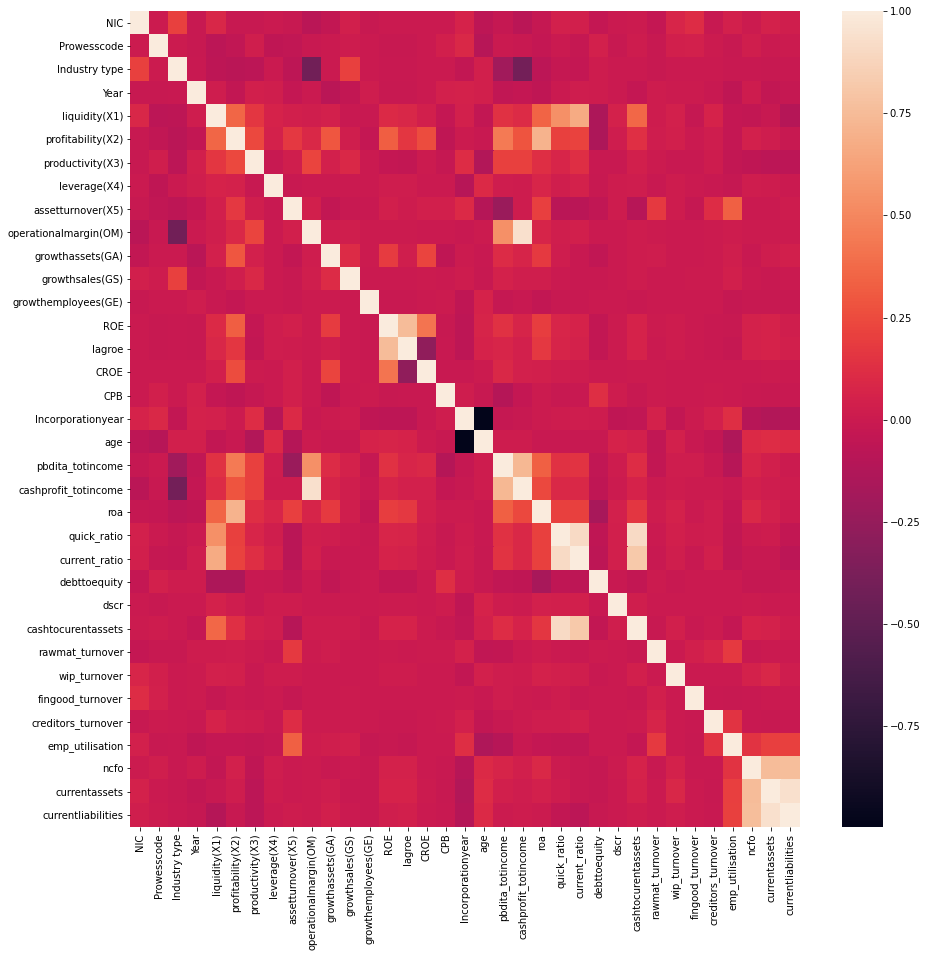

In [7]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(ma,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data[['liquidity(X1)','profitability(X2)','productivity(X3)','leverage(X4)','assetturnover(X5)']]

Y = data['bsegroup']

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=1)

In [11]:
X_train.shape, Y_test.shape, X_test.shape, Y_train.shape

((2665, 5), (1143,), (1143, 5), (2665,))

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions_logreg = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)*100))

#Confusion Matrix
Confusion_Matrix_Log_Reg= confusion_matrix(Y_test, predictions)
print('confusion matrix of Logistic Regression:')
print(Confusion_Matrix_Log_Reg)

sensitivity = Confusion_Matrix_Log_Reg[0,0]/(Confusion_Matrix_Log_Reg[0,0]+Confusion_Matrix_Log_Reg[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_Log_Reg[1,1]/(Confusion_Matrix_Log_Reg[1,0]+Confusion_Matrix_Log_Reg[1,1])
print('Specificity : ', specificity)


from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y_test,predictions_logreg))


Accuracy of logistic regression classifier on test set: 45.93
confusion matrix of Logistic Regression:
[[274  35   0   4   0   1   3]
 [ 54 345   0  15  57  13   8]
 [  0   0   0   0   3   1   0]
 [  2  12   0   4   5   0   1]
 [  2  74   5   2 139  24   1]
 [  0   9   1   0  19  17   0]
 [  1   6   0   1   1   0   4]]
Sensitivity :  0.8867313915857605
Specificity :  0.8646616541353384
              precision    recall  f1-score   support

           A       0.76      0.14      0.24       317
           B       0.44      0.98      0.61       492
           P       0.00      0.00      0.00         4
           T       0.00      0.00      0.00        24
           X       0.00      0.00      0.00       247
          XT       0.00      0.00      0.00        46
           Z       0.00      0.00      0.00        13

    accuracy                           0.46      1143
   macro avg       0.17      0.16      0.12      1143
weighted avg       0.40      0.46      0.33      1143



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, Y_train)

# Predicting the Test set results
predictions_NB = Naive_Bayes.predict(X_test)
predictions_NB

print('Accuracy of Naive Bayes on test set: {:.2f}'.format(Naive_Bayes.score(X_test, Y_test)*100))

#Confusion Matrix
Confusion_Matrix_NB= confusion_matrix(Y_test, predictions_NB)
print('confusion matrix of Naive Bayes:')
print(Confusion_Matrix_NB)


#Sensitivity & Specificity
sensitivity = Confusion_Matrix_NB[0,0]/(Confusion_Matrix_NB[0,0]+Confusion_Matrix_NB[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_NB[1,1]/(Confusion_Matrix_NB[1,0]+Confusion_Matrix_NB[1,1])
print('Specificity : ', specificity)


Accuracy of Naive Bayes on test set: 18.55
confusion matrix of Naive Bayes:
[[ 40  23   8 117 129   0   0]
 [  9  23  37 176 247   0   0]
 [  0   0   2   0   2   0   0]
 [  0   0   1  12  11   0   0]
 [  1  12  29  70 135   0   0]
 [  0   1   7  15  23   0   0]
 [  0   0   1  10   2   0   0]]
Sensitivity :  0.6349206349206349
Specificity :  0.71875


In [30]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 1, probability=True)
SVM.fit(X_train, Y_train)

predictions_SVM = SVM.predict(X_test)

ysvm = SVM.predict_proba(X_test)

print('Accuracy of SVM on test set:{:.2f}'.format(SVM.score(X_test, Y_test)*100))

#Confusion Matrix
Confusion_Matrix_SVM= confusion_matrix(Y_test, predictions_SVM)
print('confusion matrix of SVM:')
print(Confusion_Matrix_SVM)


sensitivity = Confusion_Matrix_SVM[0,0]/(Confusion_Matrix_SVM[0,0]+Confusion_Matrix_SVM[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_SVM[1,1]/(Confusion_Matrix_SVM[1,0]+Confusion_Matrix_SVM[1,1])
print('Specificity : ', specificity)



from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y_test,predictions_SVM))

Accuracy of SVM on test set:45.84
confusion matrix of SVM:
[[ 40 277   0   0   0   0   0]
 [  8 484   0   0   0   0   0]
 [  0   4   0   0   0   0   0]
 [  0  24   0   0   0   0   0]
 [  0 247   0   0   0   0   0]
 [  0  46   0   0   0   0   0]
 [  0  13   0   0   0   0   0]]
Sensitivity :  0.12618296529968454
Specificity :  0.983739837398374
              precision    recall  f1-score   support

           A       0.83      0.13      0.22       317
           B       0.44      0.98      0.61       492
           P       0.00      0.00      0.00         4
           T       0.00      0.00      0.00        24
           X       0.00      0.00      0.00       247
          XT       0.00      0.00      0.00        46
           Z       0.00      0.00      0.00        13

    accuracy                           0.46      1143
   macro avg       0.18      0.16      0.12      1143
weighted avg       0.42      0.46      0.32      1143



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

predictions_dtree= dtree.predict(X_test)
predictions_dtree

print('Accuracy of Decision Trees on test set: {:.2f}'.format(dtree.score(X_test, Y_test)*100))


#Confusion Matrix
Confusion_Matrix_dtree= confusion_matrix(Y_test, predictions_dtree)
print('confusion matrix of Decision Trees:')
print(Confusion_Matrix_dtree)

#Specificity & Sensitivity

sensitivity = Confusion_Matrix_dtree[0,0]/(Confusion_Matrix_dtree[0,0]+Confusion_Matrix_dtree[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_dtree[1,1]/(Confusion_Matrix_dtree[1,0]+Confusion_Matrix_dtree[1,1])
print('Specificity : ', specificity)

from sklearn.metrics import classification_report
#Classification Report
print(classification_report(Y_test,predictions_dtree))

Accuracy of Decision Trees on test set: 67.54
confusion matrix of Decision Trees:
[[275  37   0   4   0   0   1]
 [ 60 336   0  17  61  10   8]
 [  0   0   0   0   2   2   0]
 [  2  12   0   4   5   0   1]
 [  2  72   6   1 139  26   1]
 [  0   9   0   0  21  14   2]
 [  1   6   0   1   1   0   4]]
Sensitivity :  0.8814102564102564
Specificity :  0.8484848484848485
              precision    recall  f1-score   support

           A       0.81      0.87      0.84       317
           B       0.71      0.68      0.70       492
           P       0.00      0.00      0.00         4
           T       0.15      0.17      0.16        24
           X       0.61      0.56      0.58       247
          XT       0.27      0.30      0.29        46
           Z       0.24      0.31      0.27        13

    accuracy                           0.68      1143
   macro avg       0.40      0.41      0.40      1143
weighted avg       0.68      0.68      0.68      1143



In [27]:
#Random Forest Classifier
